In [80]:
import pandas as pd
import numpy as np
import mca
from sklearn import cluster as sc
import matplotlib.pyplot as plt

pd.set_option('display.max_column', None)


In [81]:
data = pd.read_csv('../Data/final_data.csv')
cols = data.columns[:57]
data = data[cols]
drop = [i for i in range(35,47)]
data = data.drop(data.columns[drop], axis=1)
data.head()


,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q16A,Q16B,Q16C,Q16D,Q16E,Q16F,Q16G,Q8_1-5 weken getraind,Q8_12 weken of meer getraind,Q8_6-11 weken getraind,Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar),Q8_Niet of nauwelijks getraind,Q9_1 keer per week,Q9_1 tot 3 keer per maand,Q9_2 keer per week,Q9_3 keer per week,Q9_4 of 5 keer per week,Q9_Meer dan 5 keer per week,Q9_Minder dan 1 keer per maand,Q10_0-1 maand,Q10_1-3 maanden,Q10_3-6 maanden,Q10_6 maanden - 1 jaar,Q10_Langer dan een jaar,Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe,Q11_Ik zou meer kilometers willen hardlopen,Q11_Ik zou vaker willen hardlopen,Q11_Ik zou zowel vaker als meer kilometers willen hardlopen,"Q14_Anders, namelijk ...",Q14_Ik begin meestal met hardlopen bij mijn hardloopvereniging.,Q14_Ik begin meestal met hardlopen vanuit mijn huis.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij het huis van mijn trainingspartner.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij mijn werk.,"Q15_Anders, namelijk…",Q15_Ik reis vaak meer dan 5 km van waar ik woon,Q15_Ik ren altijd binnen 1 km van waar ik woon,Q15_Ik ren altijd binnen 5 km van waar ik woon,"Q15_Niet, ik loop thuis de deur uit"
0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,False,False,False,False,False,True,False,True,False,False,False,False,False,False,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,False,False,False,False,False,True,False,True,False,False,False,False,False,False,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [82]:
X = data.values
# Sum_of_squared_distances = []
# K = range(1,20)
# for k in K:
#     km = sc.KMeans(n_clusters=k)
#     km = km.fit(X)
#     #Sum of squared distances of samples to their closest cluster center.
#     Sum_of_squared_distances.append(km.inertia_) 

# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum of squared distances')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

In [83]:
# X = data.values
# kmeans = sc.KMeans(n_clusters=2).fit(X)
clustering = sc.SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(X)
labels = clustering.labels_
labels
np.bincount(labels)

array([ 604, 1136,  405], dtype=int64)

604


Q13A                                                                                         482.0
Q13B                                                                                          16.0
Q13C                                                                                          21.0
Q13D                                                                                          27.0
Q13E                                                                                          44.0
Q13F                                                                                          18.0
Q13G                                                                                          11.0
Q16A                                                                                          12.0
Q16B                                                                                           0.0
Q16C                                                                                           6.0
Q16D      

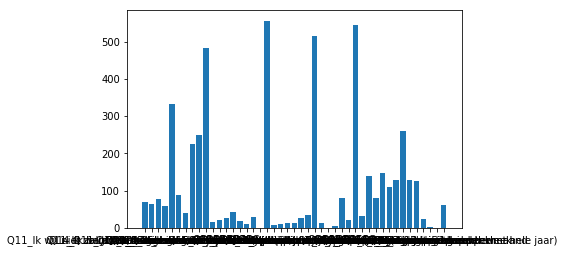

In [84]:
data['labels'] = labels
label0 = data.loc[data['labels'] == 0].astype(float)

sums0 = label0.sum()
print(len(label0))
plt.bar(label0.columns[:-1], sums0[:-1])
sums0
# label0.loc[label0['Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar)'] == 1].astype(bool)

1136


Q13A                                                                                          414.0
Q13B                                                                                           29.0
Q13C                                                                                           26.0
Q13D                                                                                           31.0
Q13E                                                                                           29.0
Q13F                                                                                          594.0
Q13G                                                                                           49.0
Q16A                                                                                          111.0
Q16B                                                                                            1.0
Q16C                                                                                           18.0


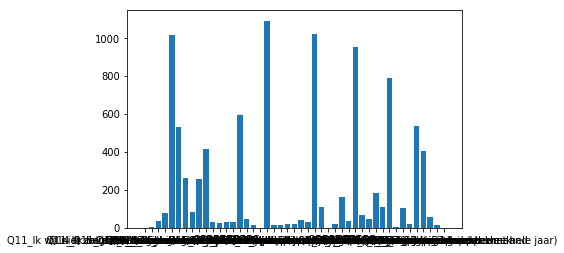

In [85]:
data['labels'] = labels
label1 = data.loc[data['labels'] == 1].astype(float)
print(len(label1))
sums1 = label1.sum()
plt.bar(label1.columns[:-1], sums1[:-1])
sums1

In [86]:
# data['labels'] = labels
# label2 = data.loc[data['labels'] == 2].astype(float)

# sums2 = label2.sum()
# plt.bar(label2.columns[:-1], sums0[:-1])
# sums2

# # for i in sums0:
#     print(i)

In [87]:
indices = []
for i in range(len(sums0)):
    if sums0[i] > 200:
        indices.append(i)



for i in range(len(sums1)):
    if sums1[i] > 200:
        if i not in indices:
            indices.append(i)
            
for i in range(len(sums2)):
    if sums2[i] > 200:
        if i not in indices:
            indices.append(i)

indices.sort()
indices = indices[:-1]
y0 = sums0[label0.columns[indices]]
y1 = sums1[label1.columns[indices]]
y2 = sums2[label2.columns[indices]]
#         print(label0.index.values)
#         print(sums1index)
# print(indices)
# ax.bar(x, z,width=0.2,color='g',align='center')
len(indices)


14

Index(['Q13A', 'Q13F', 'Q16F',
       'Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar)',
       'Q9_1 keer per week', 'Q9_2 keer per week', 'Q9_3 keer per week',
       'Q10_Langer dan een jaar',
       'Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe',
       'Q11_Ik zou meer kilometers willen hardlopen',
       'Q11_Ik zou vaker willen hardlopen',
       'Q11_Ik zou zowel vaker als meer kilometers willen hardlopen',
       'Q14_Ik begin meestal met hardlopen vanuit mijn huis.',
       'Q15_Niet, ik loop thuis de deur uit'],
      dtype='object')


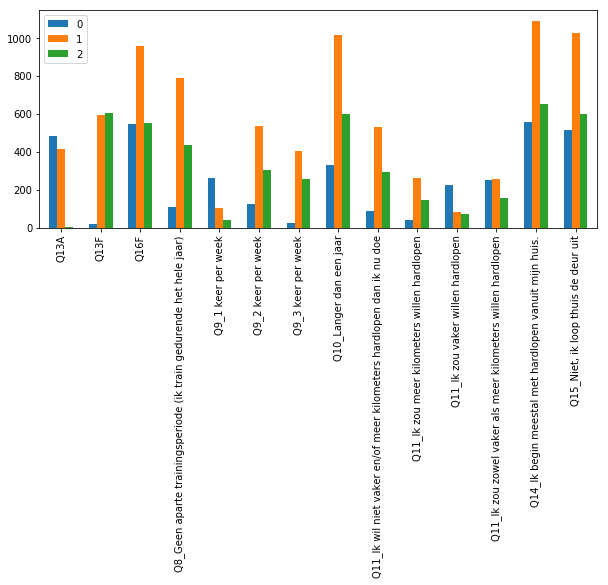

In [88]:
x = label0.columns[indices]
print(x)
y = np.array([y0,y1,y2]).T

df = pd.DataFrame(y,
                 index=x)
df.plot(kind='bar',width=.6, figsize=(10,4))